# Kirish

## Kutubxona va Datasetni chaqiramiz

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ai = pd.read_csv("AI_index_db.csv")
ai

,Country,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Cluster,Income group,Political regime
0,United States of America,100.00,94.02,64.56,100.00,100.00,77.39,100.00,100.00,Americas,Power players,High,Liberal democracy
1,China,16.51,100.00,91.57,71.42,79.97,94.87,44.02,62.92,Asia-Pacific,Power players,Upper middle,Closed autocracy
2,United Kingdom,39.65,71.43,74.65,36.50,25.03,82.82,18.91,40.93,Europe,Traditional champions,High,Liberal democracy
3,Canada,31.28,77.05,93.94,30.67,25.78,100.00,14.88,40.19,Americas,Traditional champions,High,Liberal democracy
4,Israel,35.76,67.58,82.44,32.63,27.96,43.91,27.33,39.89,Middle East,Rising stars,High,Liberal democracy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Sri Lanka,6.27,34.64,35.79,0.12,0.95,35.57,0.09,6.62,Asia-Pacific,Nascent,Lower middle,Electoral democracy
58,Egypt,1.11,38.84,0.00,2.08,1.54,68.72,0.31,4.83,Middle East,Nascent,Lower middle,Electoral autocracy
59,Kenya,0.75,14.11,29.84,0.07,12.15,7.75,0.31,2.30,Africa,Nascent,Lower middle,Electoral autocracy
60,Nigeria,2.74,0.00,50.10,0.45,2.06,7.75,0.33,1.38,Africa,Nascent,Lower middle,Electoral autocracy


## Tahrirlaymiz, kategorikal va kerak emas ustunlarni olib tashlaymiz

In [3]:
ai["Research and Development"] = (ai["Research"]+ai["Development"])/2
ai = ai.drop(["Country","Region","Cluster","Income group","Political regime","Commercial","Research","Development"], axis=1)

In [4]:
ai

,Talent,Infrastructure,Operating Environment,Government Strategy,Total score,Research and Development
0,100.00,94.02,64.56,77.39,100.00,100.000
1,16.51,100.00,91.57,94.87,62.92,75.695
2,39.65,71.43,74.65,82.82,40.93,30.765
3,31.28,77.05,93.94,100.00,40.19,28.225
4,35.76,67.58,82.44,43.91,39.89,30.295
...,...,...,...,...,...,...
57,6.27,34.64,35.79,35.57,6.62,0.535
58,1.11,38.84,0.00,68.72,4.83,1.810
59,0.75,14.11,29.84,7.75,2.30,6.110
60,2.74,0.00,50.10,7.75,1.38,1.255


In [5]:
ai.describe()

,Talent,Infrastructure,Operating Environment,Government Strategy,Total score,Research and Development
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,16.803065,63.503710,66.925484,57.865645,23.914677,15.717339
std,15.214963,20.217525,20.000424,26.252448,15.123586,17.695162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.305000
25%,7.365000,55.857500,58.107500,41.030000,14.805000,3.462500
50%,13.445000,65.230000,69.505000,63.930000,23.220000,9.962500
75%,24.567500,75.947500,80.500000,77.952500,30.487500,22.815000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [6]:
ai.std()

Talent                      15.214963
Infrastructure              20.217525
Operating Environment       20.000424
Government Strategy         26.252448
Total score                 15.123586
Research and Development    17.695162
dtype: float64

In [7]:
ai.mean()

Talent                      16.803065
Infrastructure              63.503710
Operating Environment       66.925484
Government Strategy         57.865645
Total score                 23.914677
Research and Development    15.717339
dtype: float64

## ASL Grafigimiz

In [8]:
ai.columns

Index(['Talent', 'Infrastructure', 'Operating Environment',
       'Government Strategy', 'Total score', 'Research and Development'],
      dtype='object')

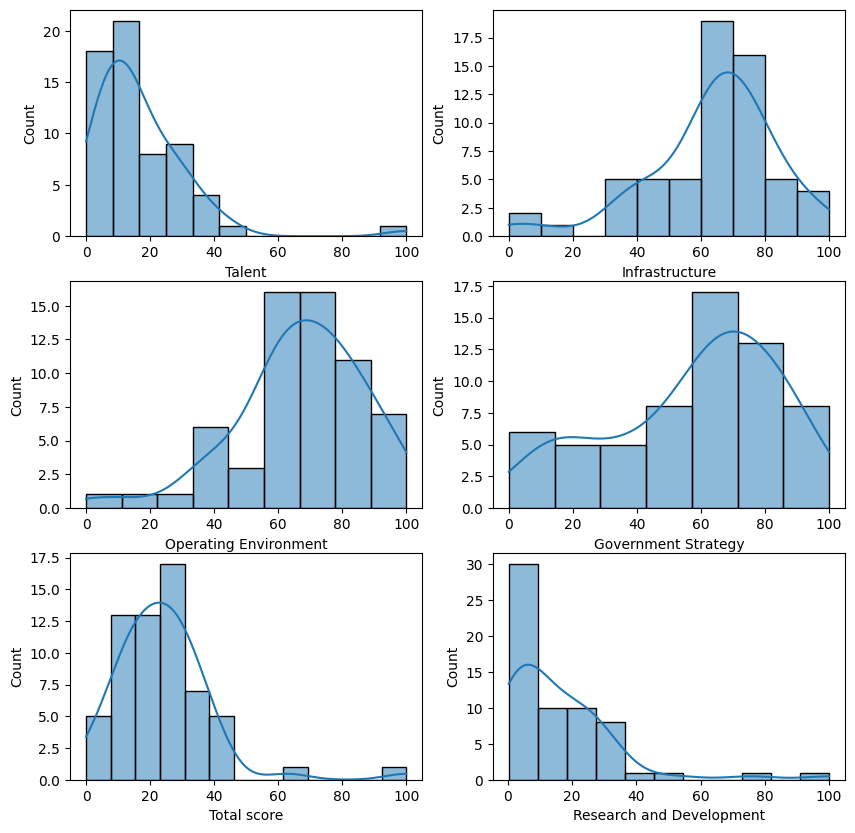

In [9]:
fig, axes = plt.subplots(3,2, figsize=(10,10))
a=0
b=0
for ai_columns in ai.columns:
    sns.histplot(x=ai[ai_columns], kde=True, ax=axes[a,b])
    b+=1
    if b==2:
        b=0
        a+=1
plt.show()

## Funksiya yasaymiz(Vizualizatsiyaga)

In [10]:
def view(ai):
    fig, axes = plt.subplots(3,2, figsize=(10,10))
    a=0
    b=0
    for ai_columns in ai.columns:
        sns.histplot(x=ai[ai_columns], kde=True, ax=axes[a,b])
        b+=1
        if b==2:
            b=0
            a+=1
    plt.show()

# Scaling Metodlari

## Standartizatsiya

Formula: Z-score = (X-mean)/std

O'rtachani '0' ga olib keladi, std =1 teng bo'ladi

In [11]:
standart = (ai-ai.mean())/ai.std()
standart

,Talent,Infrastructure,Operating Environment,Government Strategy,Total score,Research and Development
0,5.468100,1.509398,-0.118272,0.743716,5.030905,4.763034
1,-0.019262,1.805181,1.232200,1.409558,2.579105,3.389495
2,1.501610,0.392050,0.386218,0.950553,1.125085,0.850383
3,0.951493,0.670027,1.350697,1.604969,1.076155,0.706841
4,1.245940,0.201622,0.775709,-0.531594,1.056318,0.823822
...,...,...,...,...,...,...
57,-0.692283,-1.427658,-1.556741,-0.849279,-1.143557,-0.857994
58,-1.031423,-1.219917,-3.346203,0.413461,-1.261915,-0.785940
59,-1.055084,-2.443114,-1.854235,-1.908989,-1.429203,-0.542936
60,-0.924292,-3.141023,-0.841256,-1.908989,-1.490035,-0.817305


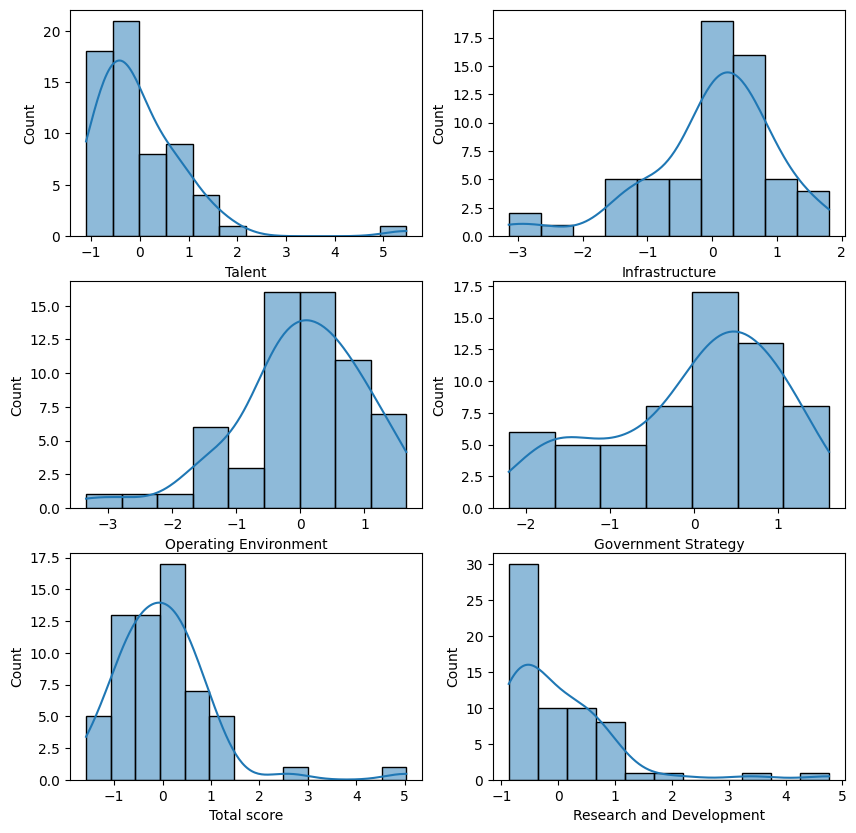

In [12]:
view(standart)

In [13]:
standart.describe()

,Talent,Infrastructure,Operating Environment,Government Strategy,Total score,Research and Development
count,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01
mean,1.522080e-16,-1.719055e-16,8.666902e-16,-1.038596e-16,5.372047e-17,2.686023e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.104378e+00,-3.141023e+00,-3.346203e+00,-2.204200e+00,-1.581284e+00,-8.709917e-01
25%,-6.203147e-01,-3.781971e-01,-4.408899e-01,-6.412981e-01,-6.023490e-01,-6.925531e-01
50%,-2.207080e-01,8.538584e-02,1.289731e-01,2.310015e-01,-4.593338e-02,-3.252210e-01
75%,5.103158e-01,6.154952e-01,6.787114e-01,7.651422e-01,4.346074e-01,4.011075e-01
max,5.468100e+00,1.805181e+00,1.653691e+00,1.604969e+00,5.030905e+00,4.763034e+00


In [14]:
standart.std()

Talent                      1.0
Infrastructure              1.0
Operating Environment       1.0
Government Strategy         1.0
Total score                 1.0
Research and Development    1.0
dtype: float64

In [15]:
standart.mean()

Talent                      1.522080e-16
Infrastructure             -1.719055e-16
Operating Environment       8.666902e-16
Government Strategy        -1.038596e-16
Total score                 5.372047e-17
Research and Development    2.686023e-16
dtype: float64

## Min-Max Scaling

Formula: X_scaled = (X -min(X))/(max(X) - min(X))

"0" dan "1" gacha masshtab laydi

In [16]:
min_max = (ai-ai.min())/(ai.max()-ai.min())
min_max

,Talent,Infrastructure,Operating Environment,Government Strategy,Total score,Research and Development
0,1.0000,0.9402,0.6456,0.7739,1.0000,1.000000
1,0.1651,1.0000,0.9157,0.9487,0.6292,0.756206
2,0.3965,0.7143,0.7465,0.8282,0.4093,0.305532
3,0.3128,0.7705,0.9394,1.0000,0.4019,0.280054
4,0.3576,0.6758,0.8244,0.4391,0.3989,0.300817
...,...,...,...,...,...,...
57,0.0627,0.3464,0.3579,0.3557,0.0662,0.002307
58,0.0111,0.3884,0.0000,0.6872,0.0483,0.015096
59,0.0075,0.1411,0.2984,0.0775,0.0230,0.058228
60,0.0274,0.0000,0.5010,0.0775,0.0138,0.009529


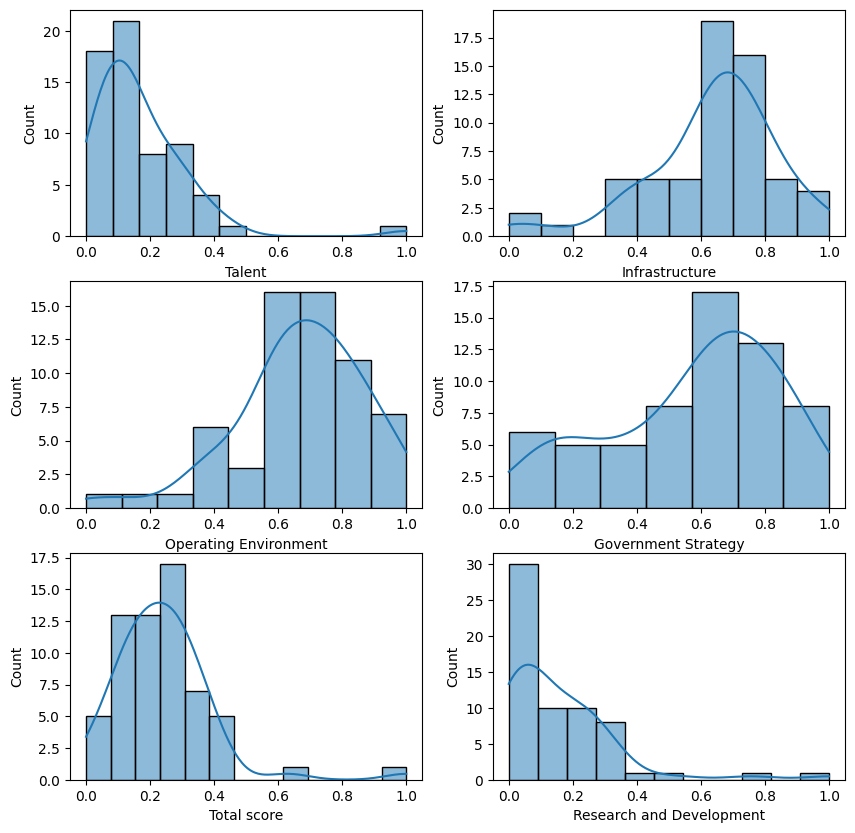

In [17]:
view(min_max)

In [18]:
min_max.describe()

,Talent,Infrastructure,Operating Environment,Government Strategy,Total score,Research and Development
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.168031,0.635037,0.669255,0.578656,0.239147,0.154595
std,0.152150,0.202175,0.200004,0.262524,0.151236,0.177493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.073650,0.558575,0.581075,0.410300,0.148050,0.031672
50%,0.134450,0.652300,0.695050,0.639300,0.232200,0.096870
75%,0.245675,0.759475,0.805000,0.779525,0.304875,0.225789
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Mean Normalisation

X_scaled = (X -mean(X))/(max(X) - min(X))

O'rtachani "0" ga tenglaydi

In [19]:
norm_mean = (ai-ai.mean())/(ai.max()-ai.min())
norm_mean

,Talent,Infrastructure,Operating Environment,Government Strategy,Total score,Research and Development
0,0.831969,0.305163,-0.023655,0.195244,0.760853,0.845405
1,-0.002931,0.364963,0.246445,0.370044,0.390053,0.601612
2,0.228469,0.079263,0.077245,0.249544,0.170153,0.150937
3,0.144769,0.135463,0.270145,0.421344,0.162753,0.125459
4,0.189569,0.040763,0.155145,-0.139556,0.159753,0.146223
...,...,...,...,...,...,...
57,-0.105331,-0.288637,-0.311355,-0.222956,-0.172947,-0.152288
58,-0.156931,-0.246637,-0.669255,0.108544,-0.190847,-0.139499
59,-0.160531,-0.493937,-0.370855,-0.501156,-0.216147,-0.096367
60,-0.140631,-0.635037,-0.168255,-0.501156,-0.225347,-0.145066


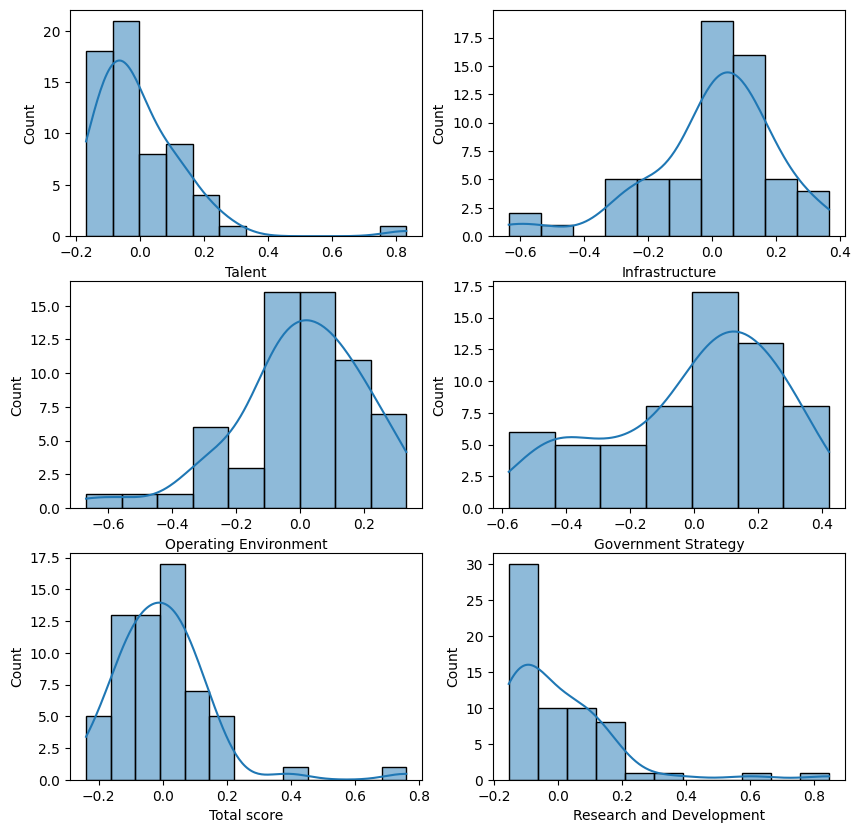

In [20]:
view(norm_mean)

In [21]:
norm_mean.describe()

,Talent,Infrastructure,Operating Environment,Government Strategy,Total score,Research and Development
count,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01
mean,2.059285e-17,-3.939501e-17,1.719055e-16,-1.880216e-17,8.953411e-19,4.252870e-17
std,1.521496e-01,2.021752e-01,2.000042e-01,2.625245e-01,1.512359e-01,1.774930e-01
min,-1.680306e-01,-6.350371e-01,-6.692548e-01,-5.786565e-01,-2.391468e-01,-1.545949e-01
25%,-9.438065e-02,-7.646210e-02,-8.817984e-02,-1.683565e-01,-9.109677e-02,-1.229233e-01
50%,-3.358065e-02,1.726290e-02,2.579516e-02,6.064355e-02,-6.946774e-03,-5.772445e-02
75%,7.764435e-02,1.244379e-01,1.357452e-01,2.008685e-01,6.572823e-02,7.119375e-02
max,8.319694e-01,3.649629e-01,3.307452e-01,4.213435e-01,7.608532e-01,8.454051e-01


## Maximum Absolute Scaling

x_scaled = x/max(|x|)

O'rtacha grafik o'rtasida bo'lmaydi, "-1" dan "1" gacha oraliqni oladi

In [22]:
abs_max = ai/abs(ai.max())
abs_max

,Talent,Infrastructure,Operating Environment,Government Strategy,Total score,Research and Development
0,1.0000,0.9402,0.6456,0.7739,1.0000,1.00000
1,0.1651,1.0000,0.9157,0.9487,0.6292,0.75695
2,0.3965,0.7143,0.7465,0.8282,0.4093,0.30765
3,0.3128,0.7705,0.9394,1.0000,0.4019,0.28225
4,0.3576,0.6758,0.8244,0.4391,0.3989,0.30295
...,...,...,...,...,...,...
57,0.0627,0.3464,0.3579,0.3557,0.0662,0.00535
58,0.0111,0.3884,0.0000,0.6872,0.0483,0.01810
59,0.0075,0.1411,0.2984,0.0775,0.0230,0.06110
60,0.0274,0.0000,0.5010,0.0775,0.0138,0.01255


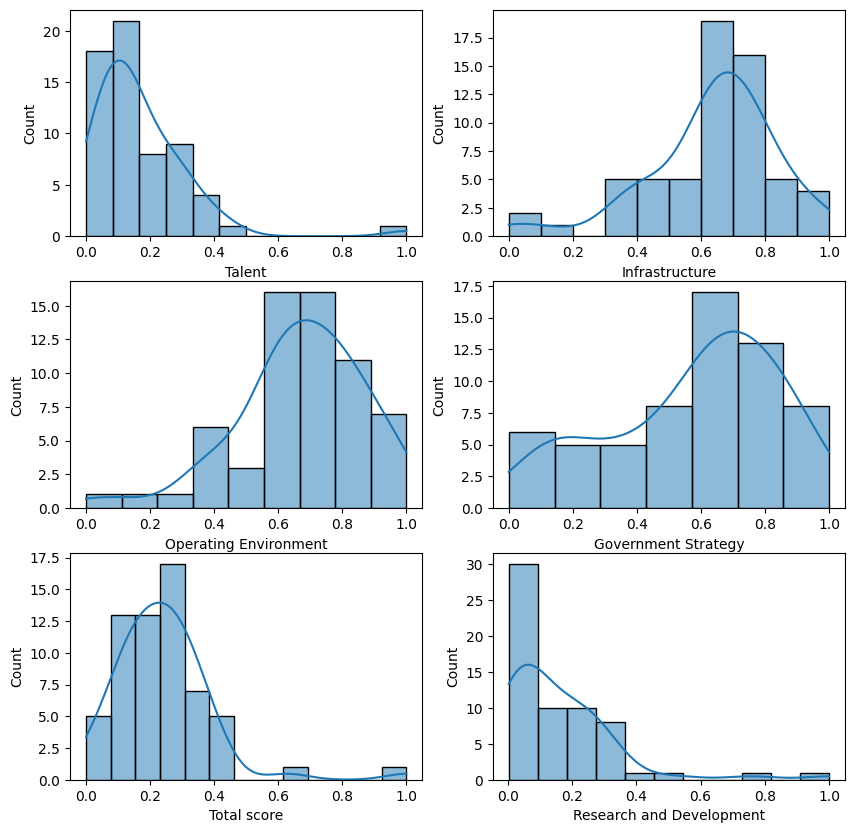

In [23]:
view(abs_max)

In [24]:
abs_max.describe()

,Talent,Infrastructure,Operating Environment,Government Strategy,Total score,Research and Development
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.168031,0.635037,0.669255,0.578656,0.239147,0.157173
std,0.152150,0.202175,0.200004,0.262524,0.151236,0.176952
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.003050
25%,0.073650,0.558575,0.581075,0.410300,0.148050,0.034625
50%,0.134450,0.652300,0.695050,0.639300,0.232200,0.099625
75%,0.245675,0.759475,0.805000,0.779525,0.304875,0.228150
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Robust Scaling (Scaling to median and IQR)

Robust = (X - median(X)) / (Q3 - Q1)

IQR = Q3 - Q1

Mediana o'rtada nolda bo'ladi. "Outier" lar bilan ishlaydi. Grafik o'zarishi mumkin.

In [25]:
robust = (ai-ai.median())/(ai.quantile(0.75)-ai.quantile(0.25))
robust

,Talent,Infrastructure,Operating Environment,Government Strategy,Total score,Research and Development
0,5.031536,1.433051,-0.220833,0.364547,4.895903,4.652500
1,0.178172,1.730712,0.985375,0.837971,2.531484,3.396590
2,1.523325,0.308611,0.229764,0.511612,1.129284,1.074926
3,1.036768,0.588352,1.091214,0.976911,1.082098,0.943677
4,1.297195,0.116974,0.577649,-0.542217,1.062968,1.050639
...,...,...,...,...,...,...
57,-0.417091,-1.522648,-1.505638,-0.768095,-1.058505,-0.487146
58,-0.717047,-1.313589,-3.103941,0.129731,-1.172645,-0.421263
59,-0.737974,-2.544550,-1.771352,-1.521565,-1.333971,-0.199070
60,-0.622293,-3.246889,-0.866585,-1.521565,-1.392635,-0.449942


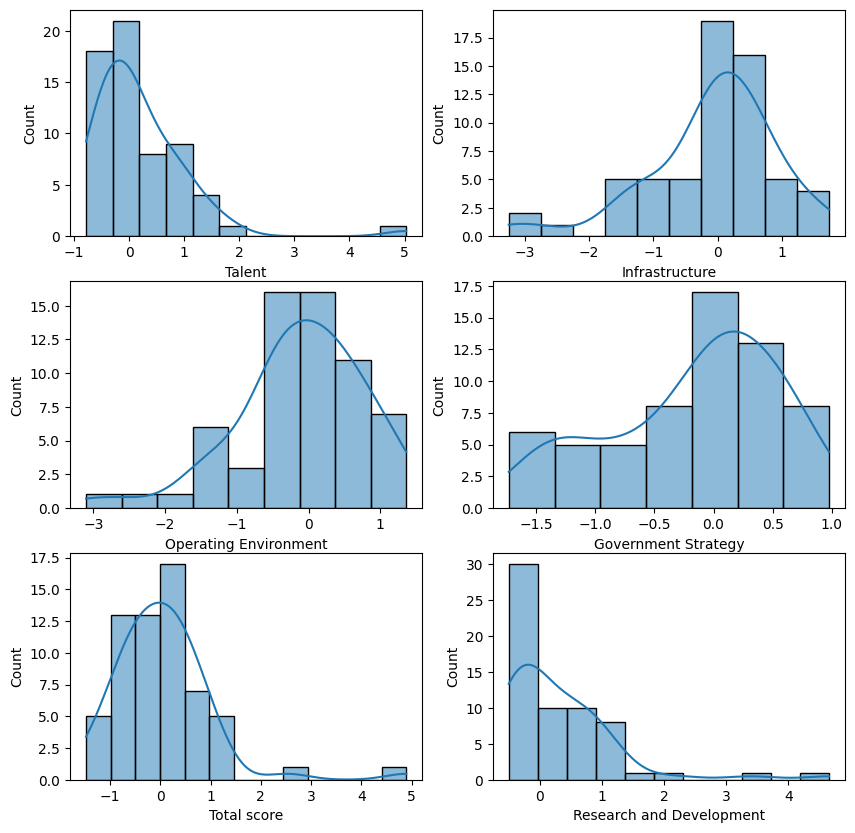

In [26]:
view(robust)

In [27]:
robust.describe()

,Talent,Infrastructure,Operating Environment,Government Strategy,Total score,Research and Development
count,62.000000,6.200000e+01,6.200000e+01,62.000000,62.000000,6.200000e+01
mean,0.195208,-8.592784e-02,-1.151955e-01,-0.164246,0.044296,2.973693e-01
std,0.884462,1.006348e+00,8.931751e-01,0.711015,0.964361,9.143605e-01
min,-0.781572,-3.246889e+00,-3.103941e+00,-1.731465,-1.480631,-4.990311e-01
25%,-0.353437,-4.665256e-01,-5.089874e-01,-0.620218,-0.536585,-3.358739e-01
50%,0.000000,3.530162e-16,3.191891e-16,0.000000,0.000000,4.597017e-17
75%,0.646563,5.334744e-01,4.910126e-01,0.379782,0.463415,6.641261e-01
max,5.031536,1.730712e+00,1.361840e+00,0.976911,4.895903,4.652500e+00


In [28]:
robust.median()

Talent                      0.000000e+00
Infrastructure              3.534499e-16
Operating Environment       3.174544e-16
Government Strategy         0.000000e+00
Total score                 0.000000e+00
Research and Development    4.553649e-17
dtype: float64

### Robust and original

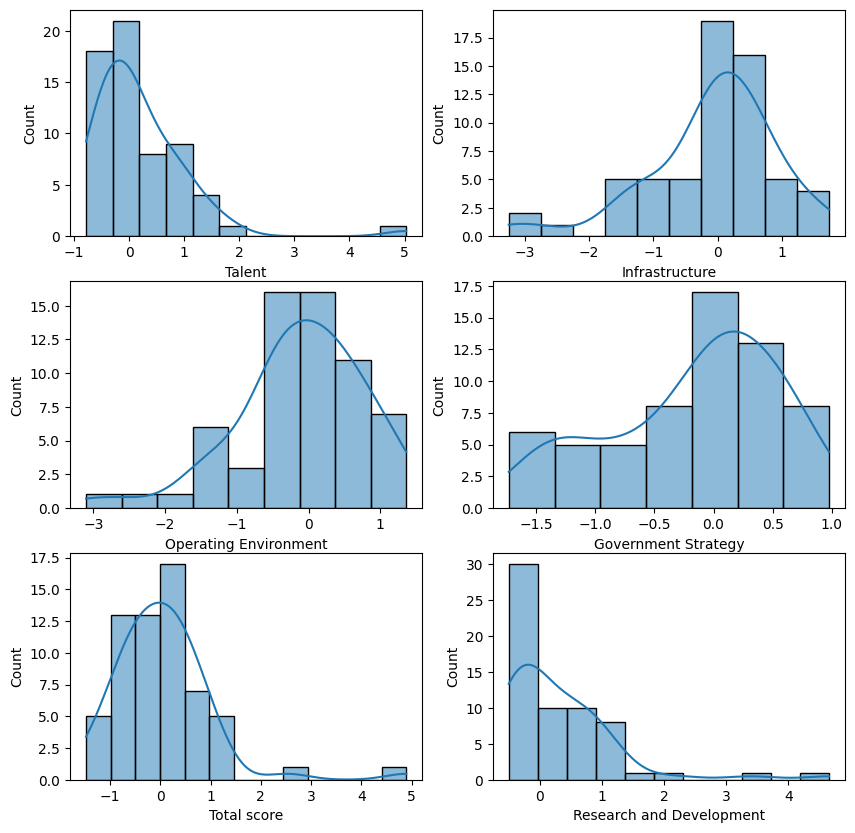

In [29]:
view(robust)

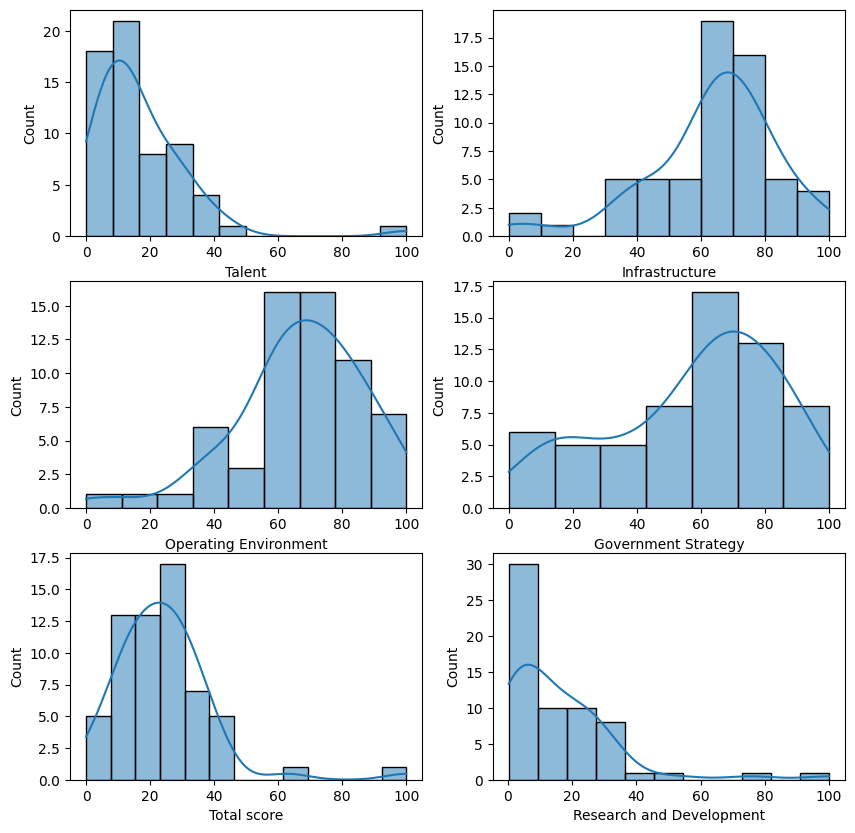

In [30]:
view(ai)

Bu yerda outlier lar bilan ishlamagan